<a href="https://colab.research.google.com/github/Griff-Kaiga/Advertising-project-in-R/blob/main/Advertising_Project_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Defining the question 
A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process.
She wants to identify which individuals are most likely to click ads.

## 2. Metrics of sucess
The project will be considered a success once we are able to provide insights on the group of people who are most likely to click ads 

## 3. Understanding the context
Targeted advertising is a form of advertising, including online advertising, that is directed towards an audience with certain traits, based on the product or person the advertiser is promoting.These traits can either be demographic with a focus on race, economic status, sex, age, generation, level of education, income level, and employment, or there can be a psychographic focus which is based on the consumer values, personality, attitude, opinion, lifestyle and interest. This focus can also entail behavioral variables, such as browser history, purchase history, and other recent online activities. Targeted advertising is focused on certain traits and consumers who are likely to have a strong preference. These individuals will receive messages instead of those who have no interest and whose preferences do not match a particular product's attributes. This eliminates waste.

## 4. Experimental design
loading the data
checking the data
Find and deal with outliers, anomalies, and missing data within the dataset.
Perform  univariate and bivariate analysis

In [1]:
# loading the data and viewing the first 6 observatons
advertising = read.csv('advertising.csv', header = TRUE)
head(advertising)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [2]:
# checking for the dimensions of the data
dim(advertising)

# the data has 1000 rows and 10 columns 

[1] 1000   10

In [3]:
# checking for the data types 
str(advertising)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [4]:
# checking for the sum of missing values 
missing <- is.na(advertising)
colSums(missing)

# there were no missing values in the data

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

In [5]:
# checking the data types
str(advertising)


'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [6]:
# checking for the unique items
unique_items <- advertising[!duplicated(advertising),]
unique_items
# there were no duplicate values 

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
7,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
8,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
9,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0


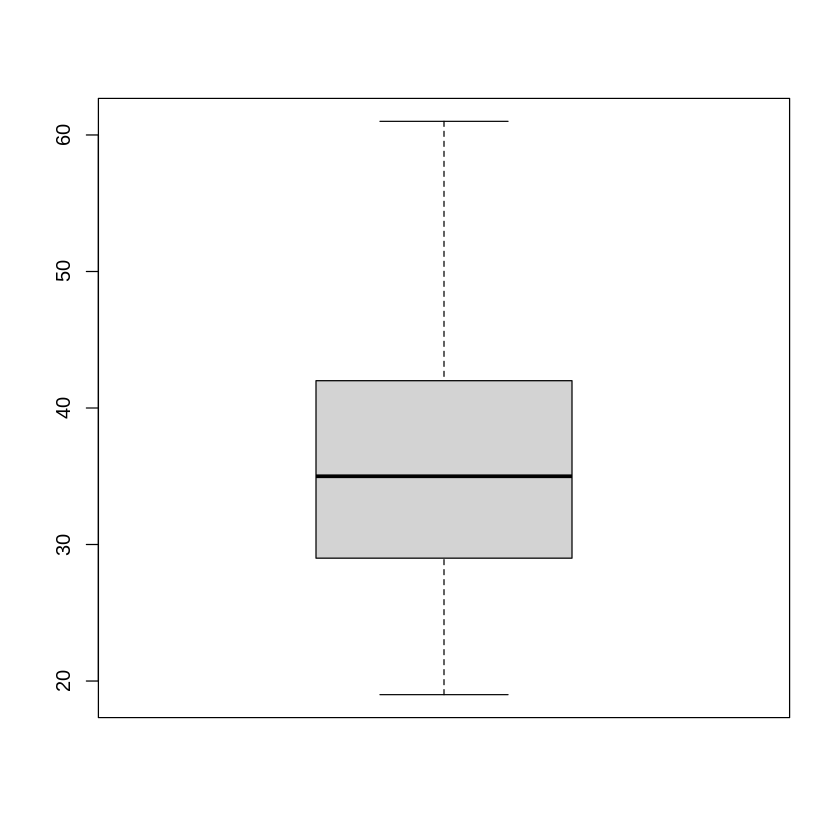

In [7]:
# checking for outliers values in the column age
boxplot(advertising$Age)

# there was no outlier in the column age

# Univariate Graphical Exploratory Data Analysis

## 1. Measures of Central Tendency



In [8]:

# getting the summaries(min, max, 1st and 3rd quantiles, median, and mean)
summary(advertising)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad.Topic.Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

In [9]:
# getting the mode
# creating a function that checks for the mode
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]}
   

In [10]:
# applying the function to the columns
# age to get the mode
advertising.Age.mode <- getmode(advertising$Age)
advertising.Age.mode

[1] 31

In [11]:
# mode for Daily.Time.Spent.on.Site
advertising.time_spent.mode <- getmode(advertising$'Daily.Time.Spent.on.Site')
advertising.time_spent.mode

[1] 62.26

In [12]:
# area of income
advertising.area_income.mode <- getmode(advertising$'Area.Income')
advertising.area_income.mode

[1] 61833.9

In [13]:
# getting the mode for column country
advertising.Country.mode <- getmode(advertising$Country)
advertising.Country.mode

[1] "Czech Republic"

In [14]:
# mode for column city
advertising.City.mode <- getmode(advertising$City)
advertising.City.mode

[1] "Lisamouth"

In [15]:
# internet usage
advertising.internet_usage.mode <- getmode(advertising$'Daily.Internet.Usage')
advertising.internet_usage.mode

[1] 167.22

In [16]:
# ad topic line
advertising.ad_topic_line.mode <- getmode(advertising$'Ad.Topic.Line')
advertising.ad_topic_line.mode

[1] "Cloned 5thgeneration orchestration"

In [17]:
# getting the range
lapply(advertising, FUN=range)


# the range for the columns time spent, age, area income, and internet usage were 32.60 91.43
# 19 61, 13996.5 79484.8, and 104.78 269.96 respectively

$Daily.Time.Spent.on.Site
[1] 32.60 91.43

$Age
[1] 19 61

$Area.Income
[1] 13996.5 79484.8

$Daily.Internet.Usage
[1] 104.78 269.96

$Ad.Topic.Line
[1] "Adaptive 24hour Graphic Interface" "Visionary reciprocal circuit"     

$City
[1] "Adamsbury"  "Zacharyton"

$Male
[1] 0 1

$Country
[1] "Afghanistan" "Zimbabwe"   

$Timestamp
[1] "2016-01-01 02:52:10" "2016-07-24 00:22:16"

$Clicked.on.Ad
[1] 0 1

In [18]:
# getting the standard deviation
lapply(advertising,FUN=sd)

# the time spent, age, area_income, and internet usage had a standard deviation,  15.85361, 8.785562, 13414.63, and 43.90234 respectively


Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”


$Daily.Time.Spent.on.Site
[1] 15.85361

$Age
[1] 8.785562

$Area.Income
[1] 13414.63

$Daily.Internet.Usage
[1] 43.90234

$Ad.Topic.Line
[1] NA

$City
[1] NA

$Male
[1] 0.4998889

$Country
[1] NA

$Timestamp
[1] NA

$Clicked.on.Ad
[1] 0.5002502

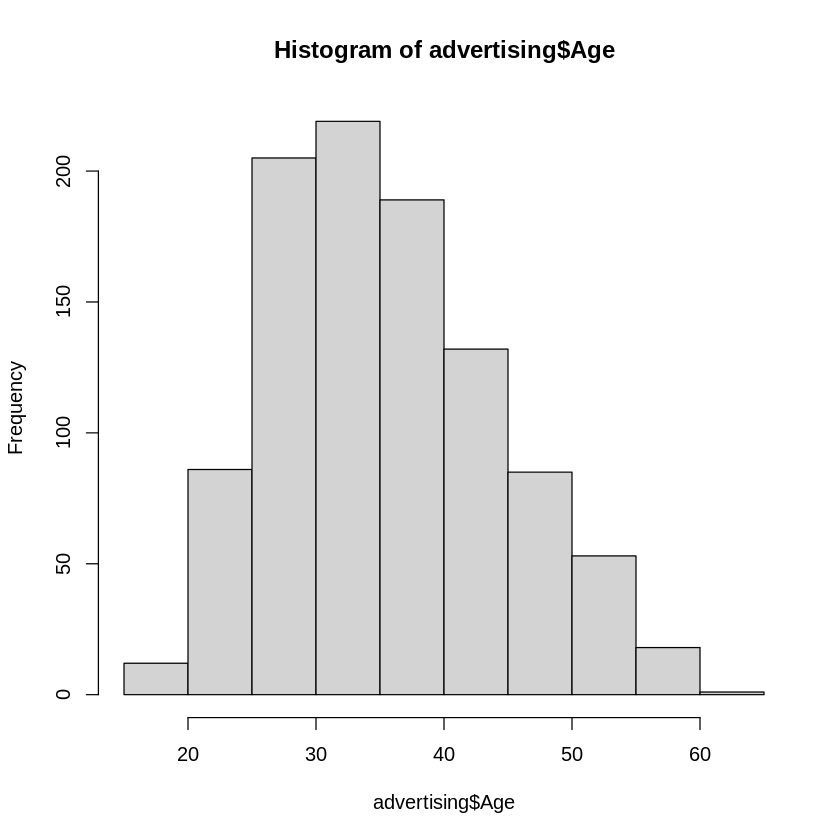

In [19]:
# histograms for the numeric columns, age
hist(advertising$Age)

# the histograms indicate that the frequent ages are between 25 years to 40 years. The least age is between 55-60 and 10-20

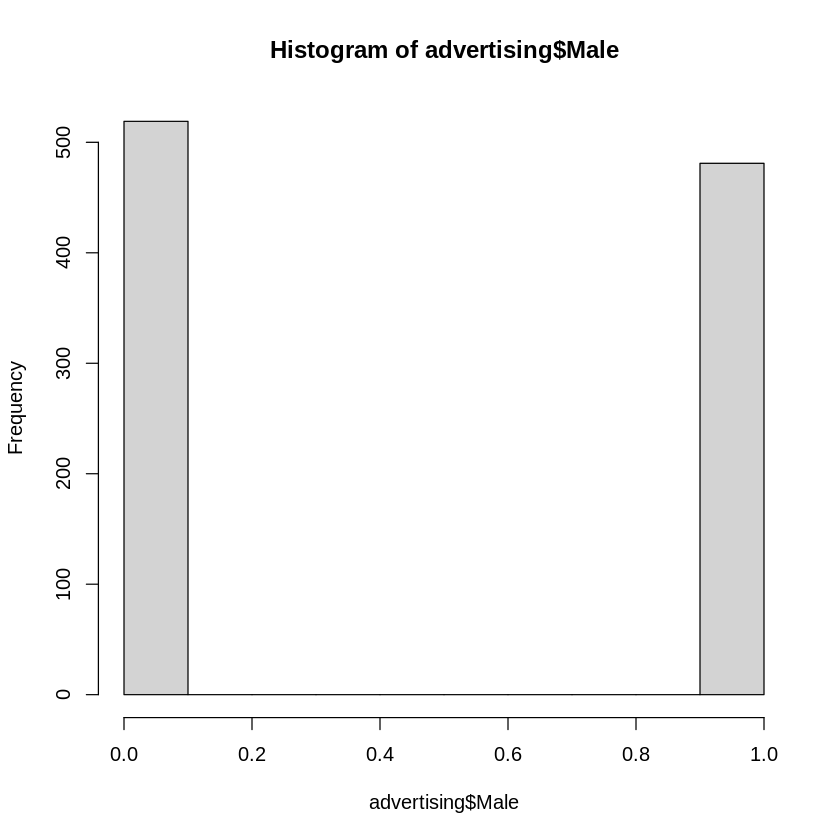

In [20]:
# hist for male(gender)

hist(advertising$Male)

# frequency for the column male(gender) was fairly equal 

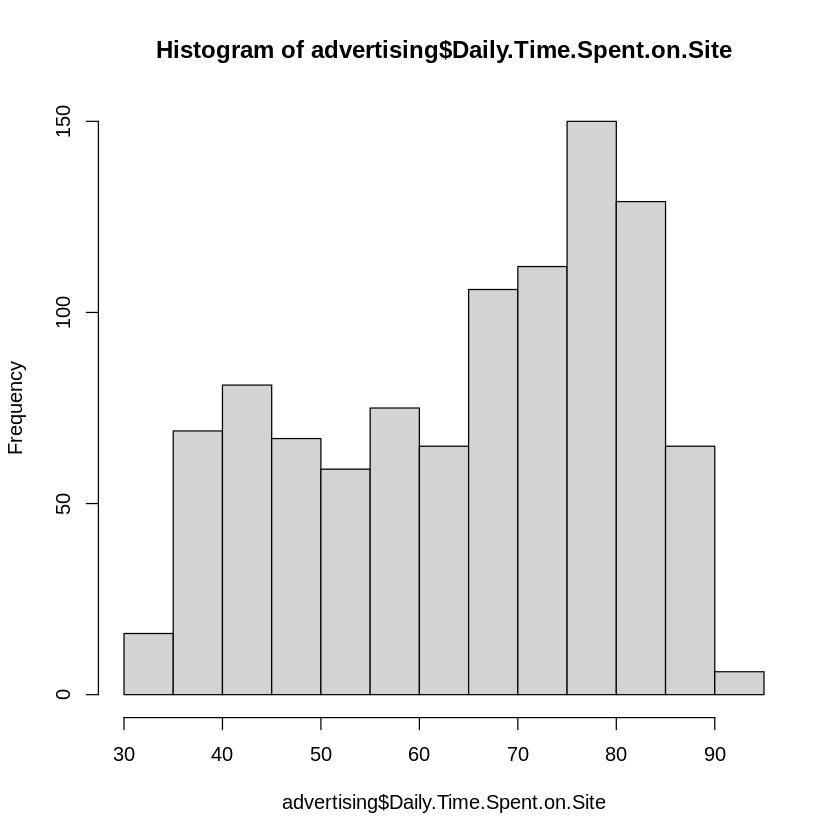

In [21]:

# histogram for Daily.Time.Spent.on.Site
hist(advertising$'Daily.Time.Spent.on.Site')

# The frequent time spent was between 65 to 85. The least appearing amount of time spent on the blog was between 30-35 and 90-95 

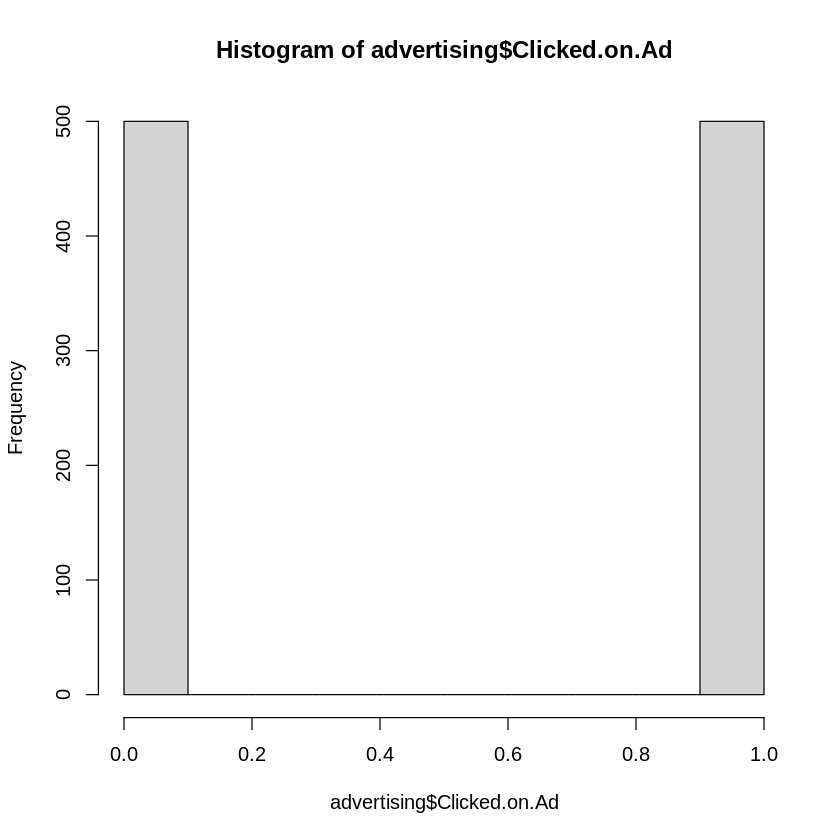

In [22]:
# histogram for the Clicked.on.Ad column 
hist(advertising$Clicked.on.Ad )

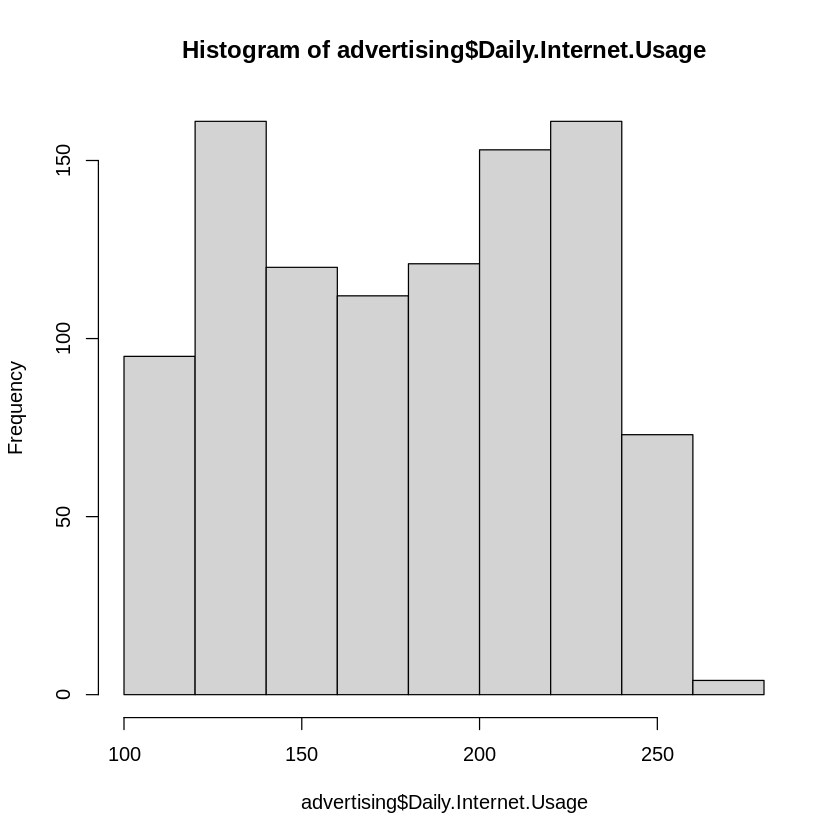

In [23]:
# histogram for the $Daily.Internet.Usage
hist(advertising$Daily.Internet.Usage )


# internet usage was frequent around 110 and 140, 200 to 240


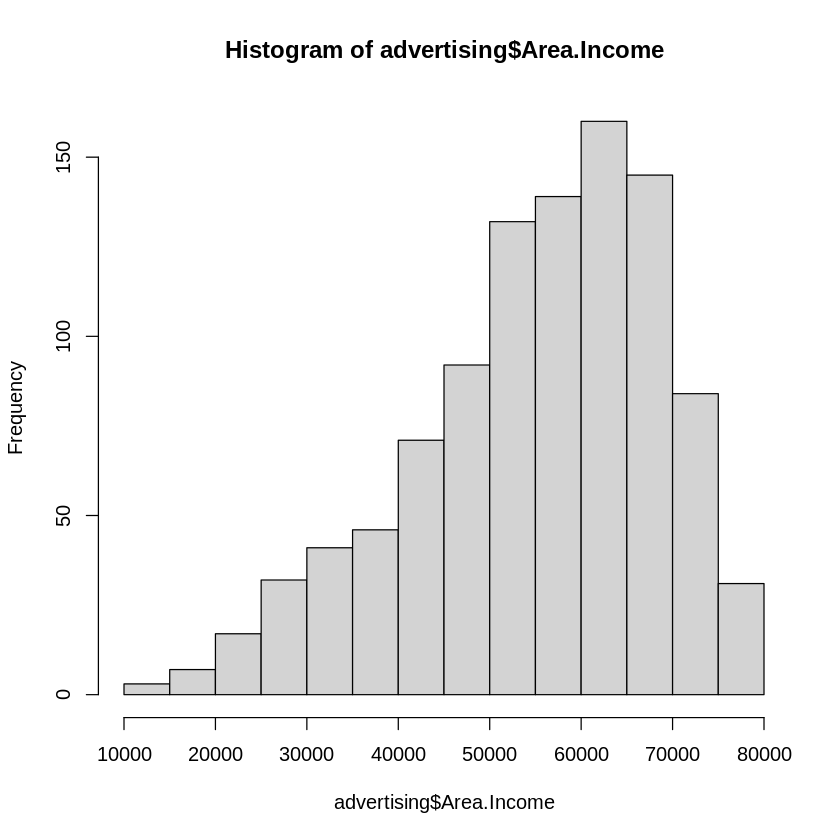

In [24]:
# histogram for area income
hist(advertising$Area.Income )

# the frequent chunk of income was between 50,000 to 70,000

In [25]:







# frequency for the column male(gender) was fairly equal 

In [27]:
## Bivariate Analysis

# determining the covariance
time_spent <- advertising$'Daily.Time.Spent.on.Site'
age <- advertising$Age
click_on_ad <- advertising$Clicked.on.Ad
gender <- advertising$Male
internet_usage <- advertising$Daily.Internet.Usage
area_income <- advertising$area_income
# for time_spent and age
cov(time_spent, age)
# # The covariance of time spent and age duration is about -46.17415. It indicates a negative linear relationship between the two variables

# for click on ad and age
cov(click_on_ad, age)
# The covariance of time spent amd age duration is about 2.164665. It indicates a positive linear relationship between the two variables

# click on ad and gender
cov(click_on_ad, gender)
# # The covariance of time click on ad and gender is about -0.00950951. It indicates a zero since the click per ad is paired equally with both greater and lesser values of the gender varaible.

# click on ad and time spent
cov(click_on_ad, time_spent)
# The covariance of click on ad and time spent is about -5.933143. It indicates a negative linear relationship between the two variables

# click on ad and internet usage
cov(click_on_ad, internet_usage)
# The covariance of click on ad and internet usage is about  -17.27409. It indicates a negative linear relationship between the two variables



[1] -46.17415

[1] 2.164665

[1] -0.00950951

[1] -5.933143

[1] -17.27409

In [28]:
# getting the correlation coefficients of the columns
cor(time_spent, age)
cor(click_on_ad, age)
cor(click_on_ad, gender)
cor(click_on_ad, time_spent)
cor(click_on_ad, internet_usage)

# the variables time spent and age have a weak negative linear correlation of -0.3315133
# the variables click on ad and age have a weak postive correlation of 0.4925313
# the variables "click on ad" and gender have an almost linear negative correlation of -0.7481166
# the variables "click on ad" and "internet usage have an almost linear negative correlation of -0.7865392  

[1] -0.3315133

[1] 0.4925313

[1] -0.03802747

[1] -0.7481166

[1] -0.7865392

## Recomendations 
Emphasis should be on the ages of between 35-45 since they are the majority in the blog.This is evident by the covariant relationship between "click on ad" and age variables.

Squeezing the cryptography course advertisment in the "Cloned 5thgeneration orchestration" ad topic would prove benefitial as evident by the mode of the ad topic line

More emphasis should be put on the country Czech Republic and the city "Lisamouth" as evident by the mode values of both
 